In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn import metrics



Using TensorFlow backend.


In [3]:
path = os.listdir('cstor/xsede/users/xs-haosun/SDSS_2000/')
#pick up the 1st image to have a look   
path_now = path[0]
a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
Obj_ID = []
Image = []
Class = []
Redshift = []
for i in range(len(path)):
    path_now = path[i]
    a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
    for j in range(a.shape[0]):
        Obj_ID.append(a[j]['objID'])
        Image.append(a[j]['image'])
        Class.append(a[j]['class'])
        Redshift.append(a[j]['z'])
Obj_ID = np.asarray(Obj_ID)
Image = np.asarray(Image)
Class = np.asarray(Class)
Redshift = np.asarray(Redshift)
Class[Class=='STAR'] = 0
Class[Class=='GALAXY'] = 1
Class[Class=='QSO'] = 2
Class = Class.astype(int)

Image_RGB = np.empty((len(Image),64,64,3))#(14142,64,64,3) RGB images
for i in range(len(Image)):
    #b[i] = np.stack((a[i][1][0],a[i][1][1],a[i][1][2],a[i][1][3],a[i][1][4]),axis=-1)
    Image_RGB[i] = np.stack((Image[i][3],Image[i][2],Image[i][1]),axis=-1)


for i in range(len(Image_RGB)):
    if True in np.isnan(Image_RGB[i]).reshape(64*64*3):
        print(i)
        Image_RGB[i][np.isnan(Image_RGB[i])==True]=np.mean(Image_RGB[i-1])
        
Image_RGB -= np.mean(Image_RGB)
Image_RGB /= np.max(Image_RGB)

8645


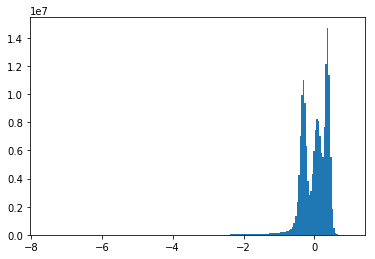

In [4]:
plt.hist(Image_RGB.reshape(-1,),200)
plt.show()

In [6]:
label = np_utils.to_categorical(Class, 3)
data = Image_RGB
index = [i for i in range(len(data))]
#random.shuffle(index)
train_data = data[index]
train_label = label[index]
Class = Class[index]
Redshift = Redshift[index]
print('train_data.shape:',train_data.shape)
print('train_label.shape:',train_label.shape)

train_data.shape: (14142, 64, 64, 3)
train_label.shape: (14142, 3)


Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7145.1335 - val_loss: -7529.4101
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7796.3130 - val_loss: -7943.5228
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7896.8412 - val_loss: -8000.2847
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7972.7795 - val_loss: -7972.4074
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7997.6539 - val_loss: -8057.8768
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8002.5675 - val_loss: -8057.4328
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8025.8156 - val_loss: -8050.1347
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8028.0324 - val_loss: -7959.4117
Epoch 9/50
12000/12000 [==============================] - 10s - loss: -8030.2599 - val_loss: -7994.0284
Epoch 10/50
120

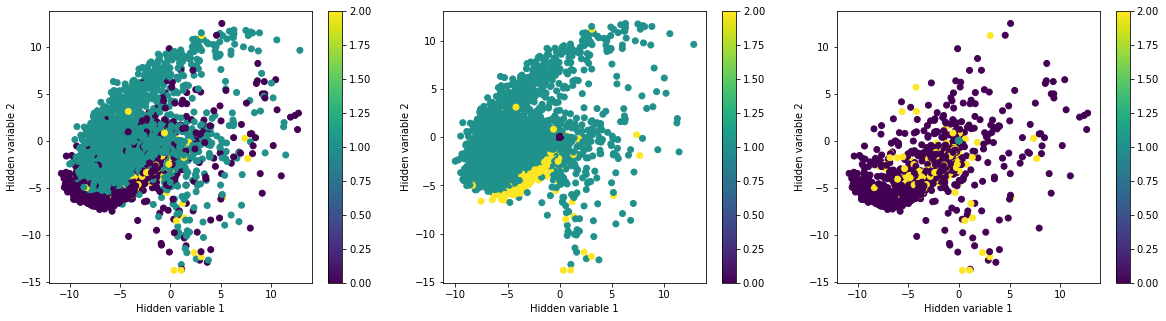

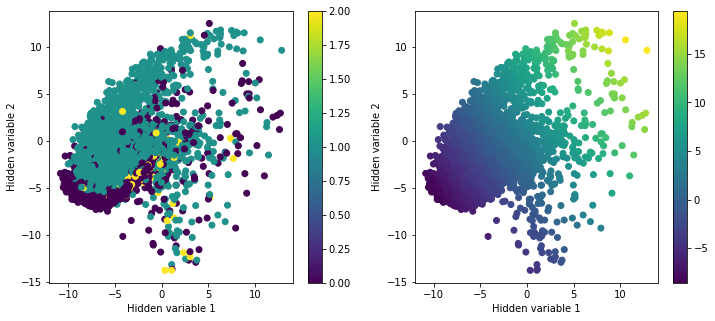

10000


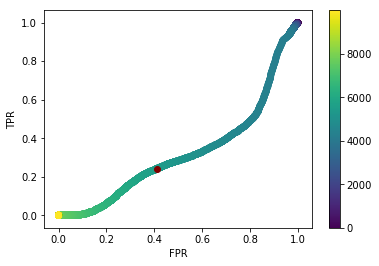

AUC: 0.321553025126
10000


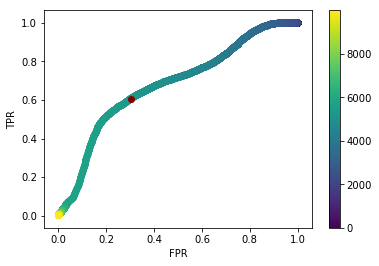

AUC: 0.677345410653
xunhuan =  0 this time, the AUC is: 0.677345410653
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 10s - loss: -7424.9276 - val_loss: -7719.1454
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7871.0993 - val_loss: -7867.9412
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7942.8038 - val_loss: -7857.5097
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7984.2285 - val_loss: -8042.2087
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7960.2964 - val_loss: -8004.3687
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8017.7554 - val_loss: -7826.3444
Epoch 7/50
12000/12000 [==============================] - 9s - loss: -8013.1251 - val_loss: -7974.1046
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8017.1751 - val_loss: -8012.0742
Epoch 9/50
12000/12000 [===========================

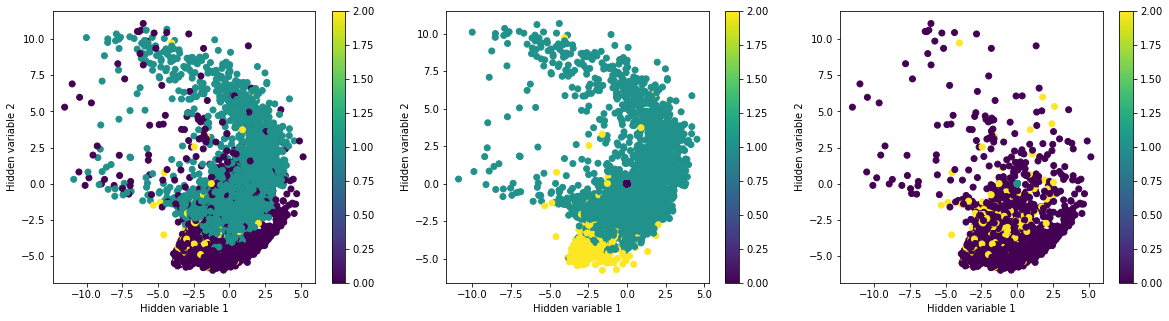

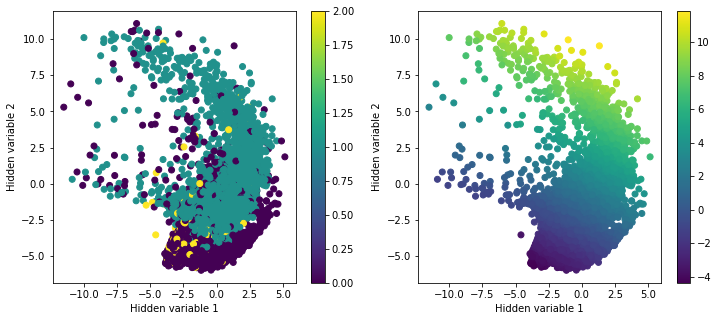

10000


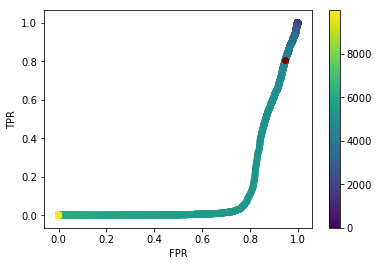

AUC: 0.124650753678
10000


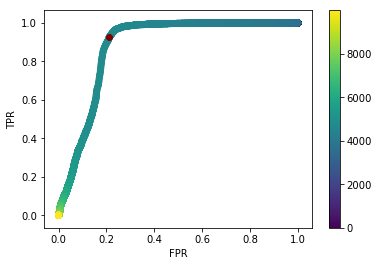

AUC: 0.875349246322
xunhuan =  1 this time, the AUC is: 0.875349246322
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 10s - loss: -7228.3275 - val_loss: -7716.1380
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7823.1380 - val_loss: -8022.3252
Epoch 3/50
12000/12000 [==============================] - 8s - loss: -7919.6099 - val_loss: -8013.3797
Epoch 4/50
12000/12000 [==============================] - 9s - loss: -7966.8356 - val_loss: -7964.6219
Epoch 5/50
12000/12000 [==============================] - 9s - loss: -7992.8265 - val_loss: -8049.4295
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8004.1250 - val_loss: -7944.7637
Epoch 7/50
12000/12000 [==============================] - 9s - loss: -8009.4495 - val_loss: -8054.2242
Epoch 8/50
12000/12000 [==============================] - 9s - loss: -8017.7170 - val_loss: -8006.8118
Epoch 9/50
12000/12000 [==============================

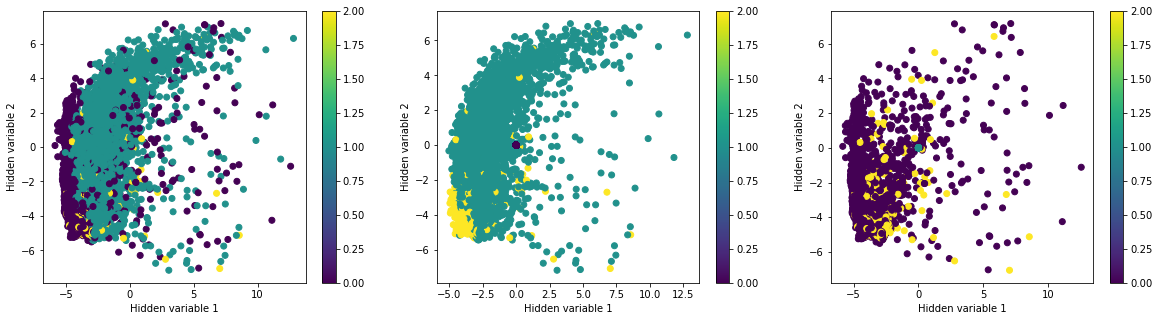

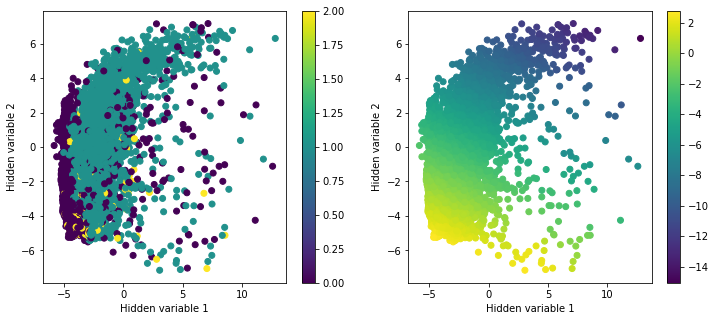

10000


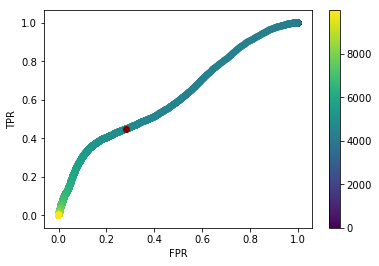

AUC: 0.61917419022
10000


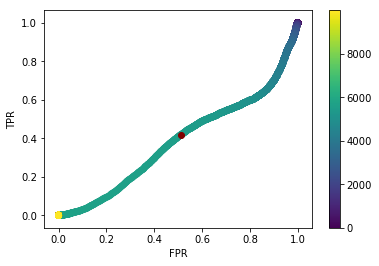

AUC: 0.38082580978
xunhuan =  2 this time, the AUC is: 0.61917419022
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7264.1304 - val_loss: -7645.3482
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7869.2360 - val_loss: -7943.5357
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7945.4734 - val_loss: -8031.2274
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7982.9013 - val_loss: -7987.4330
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8012.7499 - val_loss: -8074.1331
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8001.5721 - val_loss: -8067.9901
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8013.4457 - val_loss: -8026.2994
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8009.6794 - val_loss: -8020.4777
Epoch 9/50
12000/12000 [============================

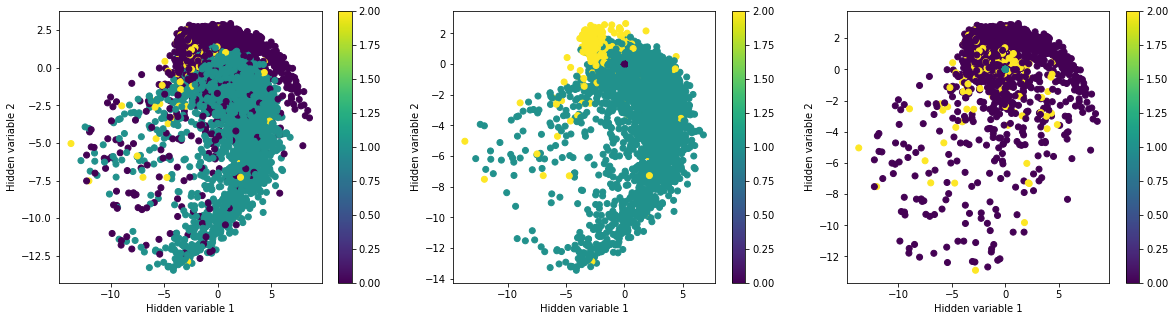

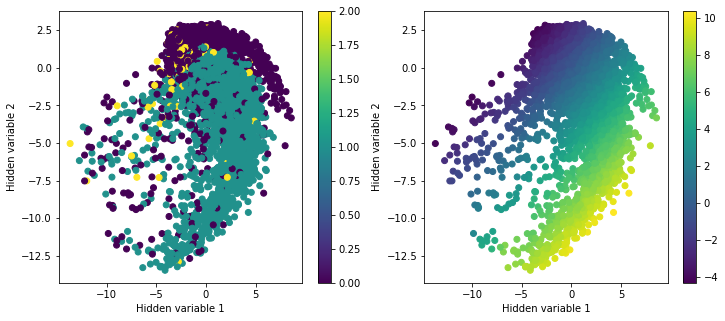

10000


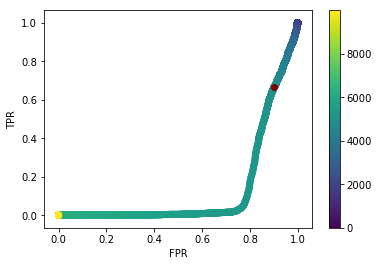

AUC: 0.132131355214
10000


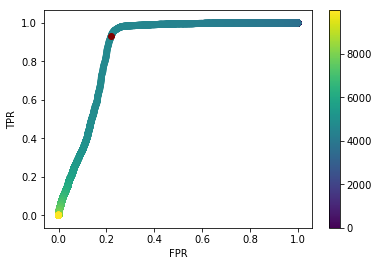

AUC: 0.867868644786
xunhuan =  3 this time, the AUC is: 0.867868644786
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 10s - loss: -6922.9097 - val_loss: -6578.1830
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7423.7217 - val_loss: -7866.5376
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7930.0656 - val_loss: -8034.3720
Epoch 4/50
12000/12000 [==============================] - 11s - loss: -7967.7335 - val_loss: -8030.1860
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7993.3432 - val_loss: -7784.9470
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8003.2318 - val_loss: -7736.4362
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8012.9779 - val_loss: -8042.6213
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8014.0578 - val_loss: -7999.4487
Epoch 9/50
12000/12000 [=========================

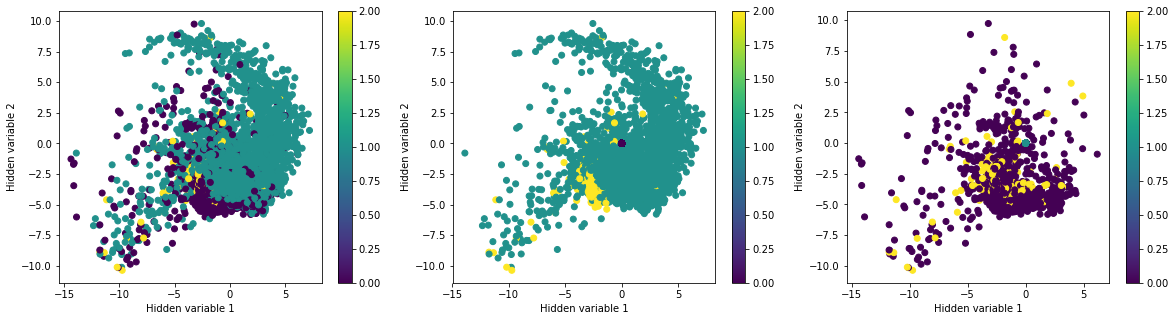

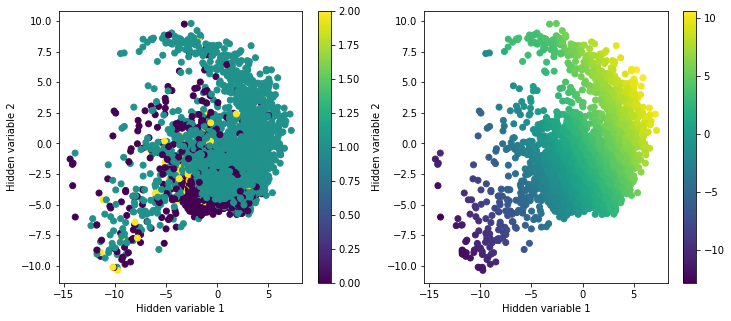

10000


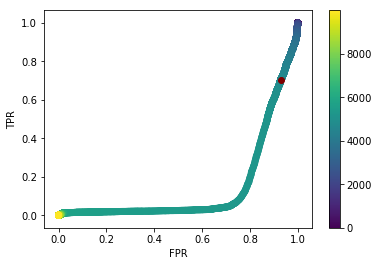

AUC: 0.14180276878
10000


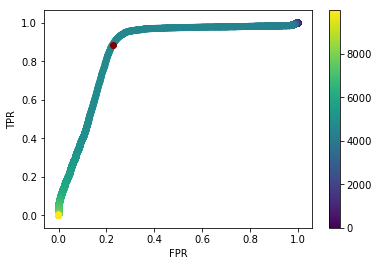

AUC: 0.85819723122
xunhuan =  4 this time, the AUC is: 0.85819723122
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7381.2938 - val_loss: -7877.6582
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7887.7832 - val_loss: -7971.8001
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7955.5693 - val_loss: -7993.2503
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7977.8902 - val_loss: -8057.4854
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7995.6833 - val_loss: -8008.2769
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -7995.0470 - val_loss: -8044.1406
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8014.7289 - val_loss: -8059.9905
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8017.9805 - val_loss: -7957.8428
Epoch 9/50
12000/12000 [===========================

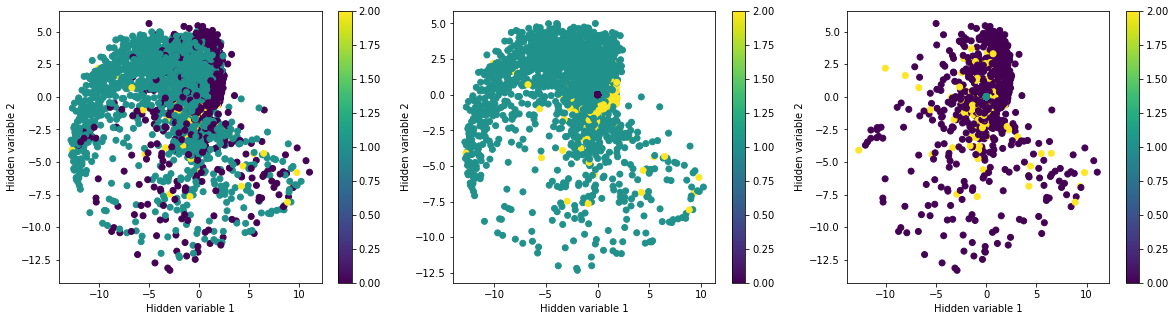

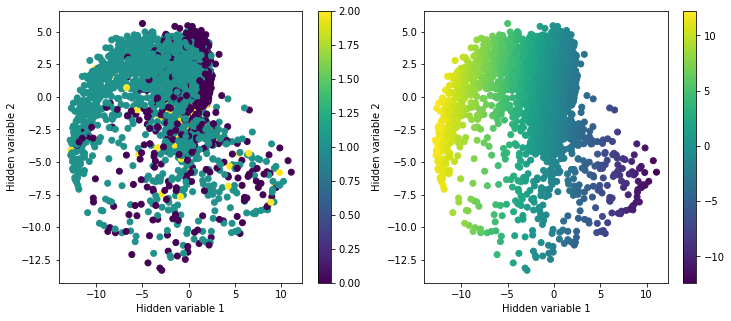

10000


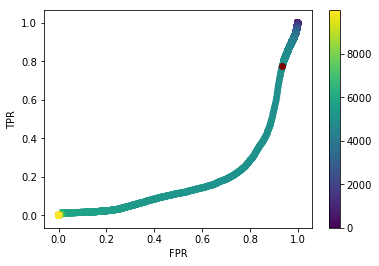

AUC: 0.193471545828
10000


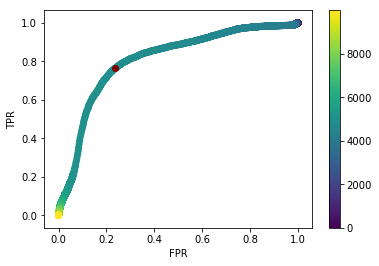

AUC: 0.806528454172
xunhuan =  5 this time, the AUC is: 0.806528454172
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 14s - loss: -7353.1259 - val_loss: -7592.1041
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7868.0936 - val_loss: -8011.1894
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7951.1489 - val_loss: -7984.0381
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7996.3732 - val_loss: -8052.1967
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8015.7013 - val_loss: -8062.0582
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8026.5926 - val_loss: -8057.6917
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8012.0754 - val_loss: -8047.6709
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8031.0372 - val_loss: -8067.6373
Epoch 9/50
12000/12000 [========================

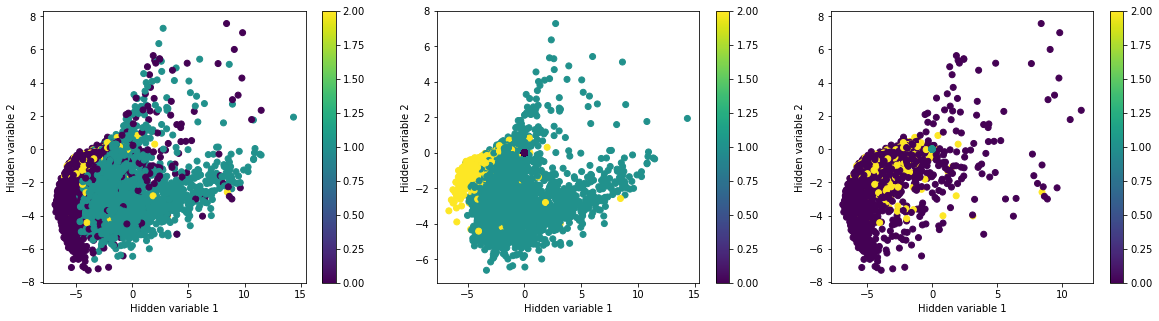

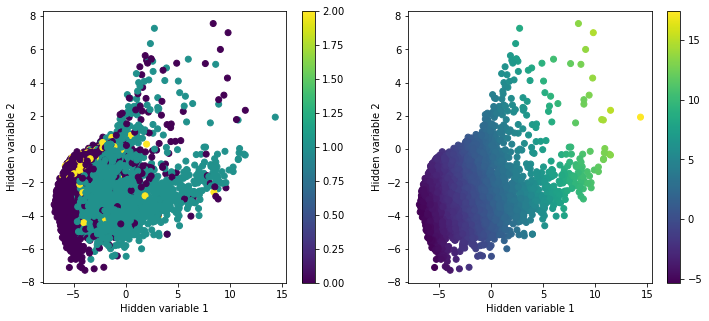

10000


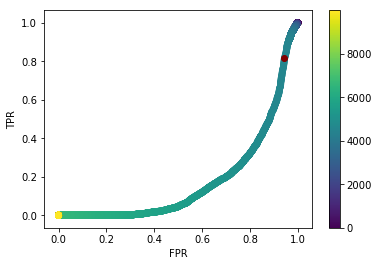

AUC: 0.176741192135
10000


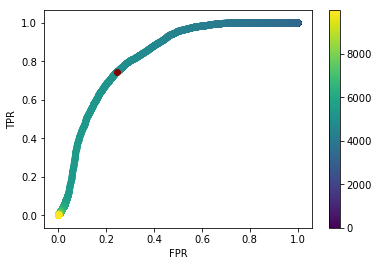

AUC: 0.823038495021
xunhuan =  6 this time, the AUC is: 0.823038495021
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7465.3084 - val_loss: -7988.2570
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7874.8207 - val_loss: -7917.7559
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7950.3438 - val_loss: -7750.3221
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -8010.5607 - val_loss: -8057.1797
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8011.3521 - val_loss: -8067.0796
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8013.9490 - val_loss: -8030.7013
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8028.7362 - val_loss: -7885.6321
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8030.7841 - val_loss: -8049.1499
Epoch 9/50
12000/12000 [==========================

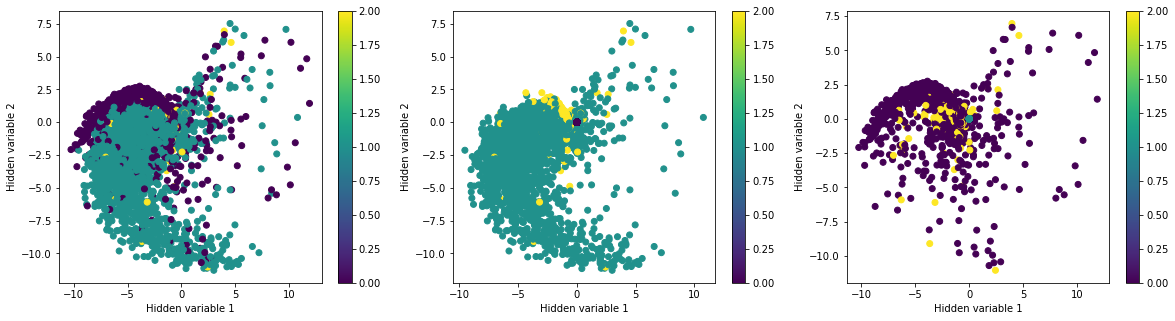

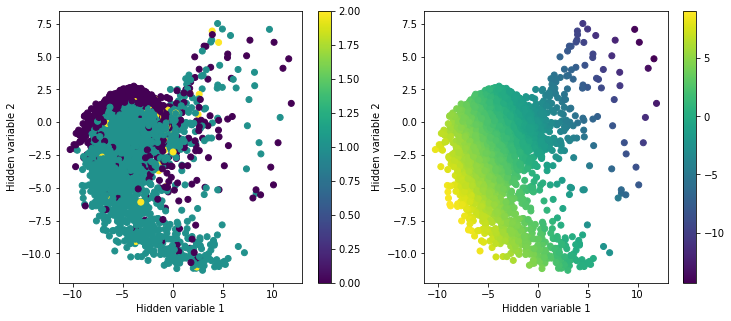

10000


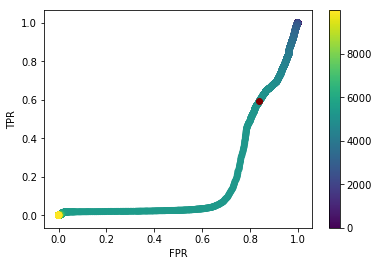

AUC: 0.184924382184
10000


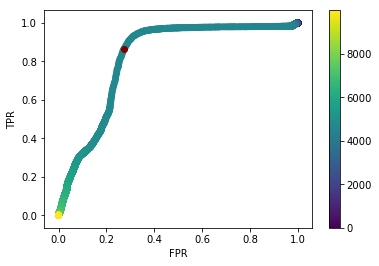

AUC: 0.815075617816
xunhuan =  7 this time, the AUC is: 0.815075617816
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 15s - loss: -7282.3523 - val_loss: -7831.6169
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7884.3782 - val_loss: -7714.4803
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7939.7726 - val_loss: -7993.4149
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7982.7833 - val_loss: -7570.8534
Epoch 5/50
12000/12000 [==============================] - 13s - loss: -7975.5111 - val_loss: -8057.0178
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7999.0984 - val_loss: -8008.2349
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8028.3906 - val_loss: -7854.8492
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8030.4779 - val_loss: -8078.4065
Epoch 9/50
12000/12000 [========================

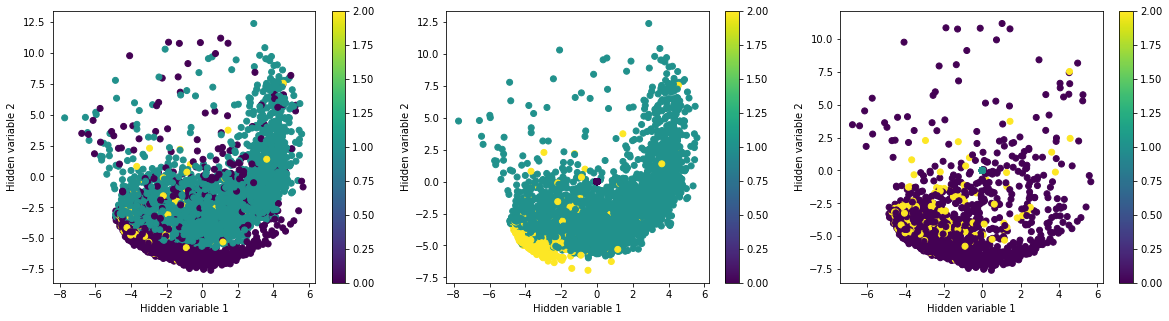

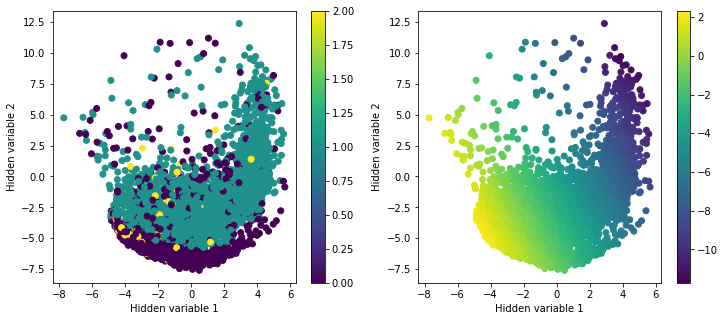

10000


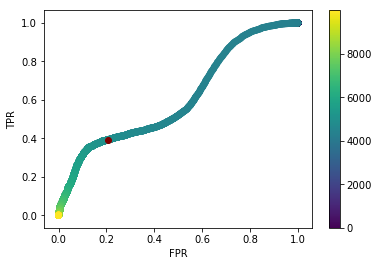

AUC: 0.607926080052
10000


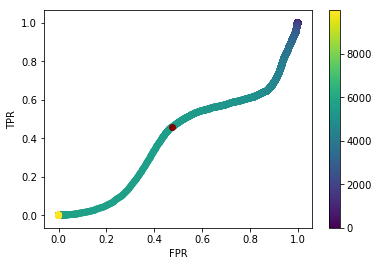

AUC: 0.392073919948
xunhuan =  8 this time, the AUC is: 0.607926080052
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7374.0435 - val_loss: -7624.0307
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7841.5389 - val_loss: -7762.9762
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7937.0467 - val_loss: -8019.0213
Epoch 4/50
12000/12000 [==============================] - 9s - loss: -7956.8438 - val_loss: -7993.5233
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8013.6267 - val_loss: -8065.9218
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8021.2904 - val_loss: -7978.7303
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8026.5398 - val_loss: -8066.7015
Epoch 8/50
12000/12000 [==============================] - 9s - loss: -8035.5311 - val_loss: -8075.4234
Epoch 9/50
12000/12000 [============================

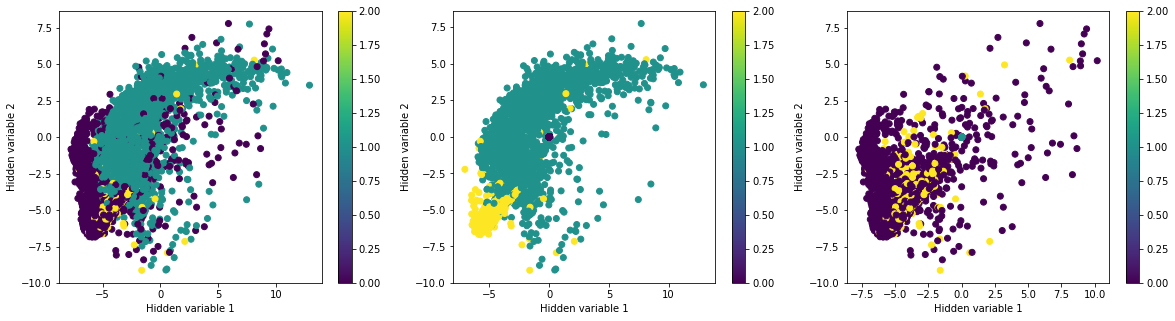

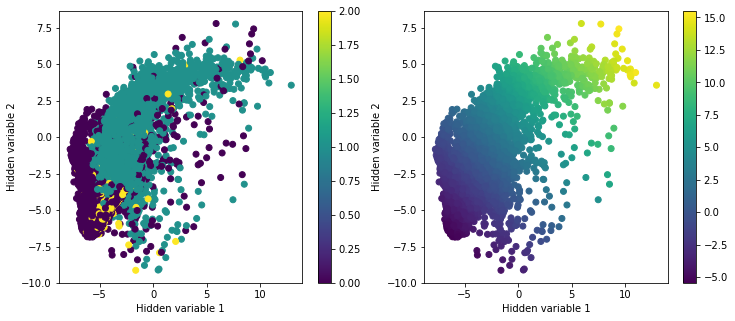

10000


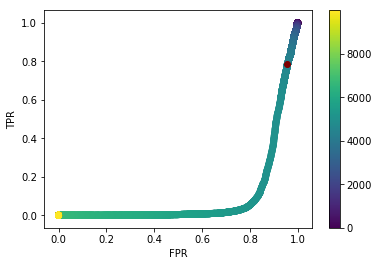

AUC: 0.0941262835251
10000


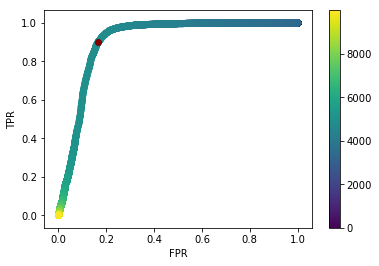

AUC: 0.905433090786
xunhuan =  9 this time, the AUC is: 0.905433090786


In [10]:
for xunhuan in range(10):
    batch_size =100
    latent_dim = 2
    nb_epoch = 50  
    epsilon_std = 0.1 
    intermediate_dim =256
    original_dim = 64*64

    #USE = 'autoencoder'
    USE = 'vae'
    #encoder:

    input_img = Input(shape=(64,64,3))


    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    #x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    #x = MaxPooling2D((2, 2),  padding='same')(x)

    visual = Flatten()(x)
    h_1 = Dense(intermediate_dim, activation='tanh')(visual)
    encoded = Dense(latent_dim, activation='relu')(h_1)

    z_mean = Dense(latent_dim)(h_1)
    z_log_var = Dense(latent_dim)(h_1)

    def sampling(args):   
        z_mean, z_log_var = args  
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2)* epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    if USE == 'vae':
        h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

    if USE == 'autoencoder':
        h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE


    h_4 = Dense(20*2*2,activation='relu')(h_3)
    h_5 = Reshape((2,2,20))(h_4)


    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(80,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(x)

    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


    #def vae_loss(x, decoded):
    #    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
    #    kl_loss = - 0.5 * K.sum(1 + z_log_var - 0.5*K.square(z_mean-1) - 0.5*K.square(z_mean+1) - K.exp(z_log_var), axis=-1) 
    #    return xent_loss + 1*kl_loss  
    def vae_loss(x, decoded):
        xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
        #kl_loss_d1 = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) 
        m = K.constant(1)
        s = K.constant(1)
        #kl_loss_d1 = K.sum(K.log(2/K.exp(z_log_var/2))+(K.square(z_mean)+(K.exp(z_log_var/2)-K.constant(1))*(K.exp(z_log_var/2)+K.constant(1)))/(K.constant(2)),axis = -1)
        kl_loss_d1 = K.sum(K.log(2*s/K.exp(z_log_var/2))+(K.constant(2)*m*(-K.exp(-(K.square(z_mean))/((K.constant(2))*K.exp(z_log_var)))*K.exp(z_log_var/2) + K.sqrt(K.constant(np.pi/2))*z_mean*(K.constant(1)-K.tanh(K.constant(1.19)*z_mean/K.constant(np.sqrt(2))/K.exp(z_log_var/2)))) )/(K.square(s))+(K.square(m-z_mean)+(K.exp(z_log_var/2)-s)*(K.exp(z_log_var/2)+s))/(K.constant(2)*K.square(s)),axis = -1)
        return 1*xent_loss + 1*kl_loss_d1 




    def ae_loss(x, decoded):  
        xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
        return xent_loss

    if USE == 'autoencoder':
        autoencoder = Model(inputs=input_img, outputs=decoded)
        autoencoder.compile(optimizer='rmsprop', loss=ae_loss)
    if USE == 'vae':
        vae = Model(inputs=input_img, outputs=decoded) 
        vae.compile(optimizer='rmsprop', loss=vae_loss) 

    vae.fit(train_data[:12000], train_data[:12000],
            shuffle=True,
            epochs=50,
            batch_size=batch_size,
            validation_data=(train_data[12000:14100],train_data[12000:14100]),callbacks=[EarlyStopping])    
    
    lower_lim = 0
    upper_lim = 14100

    label_value = np.zeros(len(train_label))
    for i in range(len(label_value)):
        label_value[i] =np.argmax(train_label[i])

    vis = Model(input_img, z_mean)

    # display a 2D plot of the digit classes in the latent space  
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)

    x_vis_1 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_1[label_value[lower_lim:upper_lim]<1]=0

    x_vis_2 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_2[label_value[lower_lim:upper_lim]==1]=0

    plt.figure(figsize=(20, 5))

    ax = plt.subplot(1,3,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,2)
    plt.scatter( x_vis_1[:, 0] ,x_vis_1[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,3)
    plt.scatter( x_vis_2[:, 0] ,x_vis_2[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    lower_lim = 0
    upper_lim = 14100


    vis = Model(input_img, z_mean)
    # display a 2D plot of the digit classes in the latent space
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    n_neighbors = 10
    n_components = 1
    isomap = manifold.Isomap(n_neighbors, n_components)
    hid_pred = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    Y_pred = isomap.fit_transform(hid_pred)


    plt.figure(figsize=(12, 5))

    ax = plt.subplot(1,2,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,2,2)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=Y_pred)
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_1 = metrics.auc(FPR, TPR)
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_2 = metrics.auc(FPR, TPR)
    AUC = AUC_2
    if AUC_1>AUC_2:
        AUC = AUC_1
    print("xunhuan = ",xunhuan,"this time, the AUC is:",AUC)
        

In [2]:
import numpy as np
AUC = [0.677345410653,0.875349246322,0.61917419022,0.867868644786,0.85819723122,0.806528454172,0.823038495021,0.905433090786,0.607926080052]
AUC = np.asarray(AUC)
print(np.mean(AUC))

0.78231787147


(array([ 2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  3.,  1.]),
 array([ 0.60792608,  0.63767678,  0.66742748,  0.69717818,  0.72692888,
         0.75667959,  0.78643029,  0.81618099,  0.84593169,  0.87568239,
         0.90543309]),
 <a list of 10 Patch objects>)

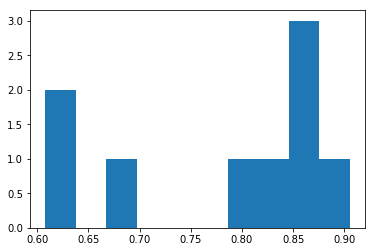

In [4]:
plt.hist(AUC)